In [1]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_excel("data.xlsx")

In [3]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


Preliminary analysis:

Perform preliminary data inspection and report the findings as to the structure of the data, missing values, duplicates, etc.
Based on the findings from the previous question remove duplicates (if any) , treat missing values using an appropriate strategy.

In [4]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
df.duplicated().sum()

1

In [6]:
df.drop_duplicates(inplace=True)

Prepare an informative report about the data explaining the distribution of the disease and the related factors. You could use the below approach to achieve the objective

Get a preliminary statistical summary of the data. Explore the measures of central tendencies and the spread of the data overall.

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Identify the data variables which might be categorical in nature. Describe and explore these variables using appropriate tools e.g. count plot

In [8]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [9]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [10]:
cat_var=['sex', 'cp','fbs', 'restecg','exang','slope', 'ca', 'thal']

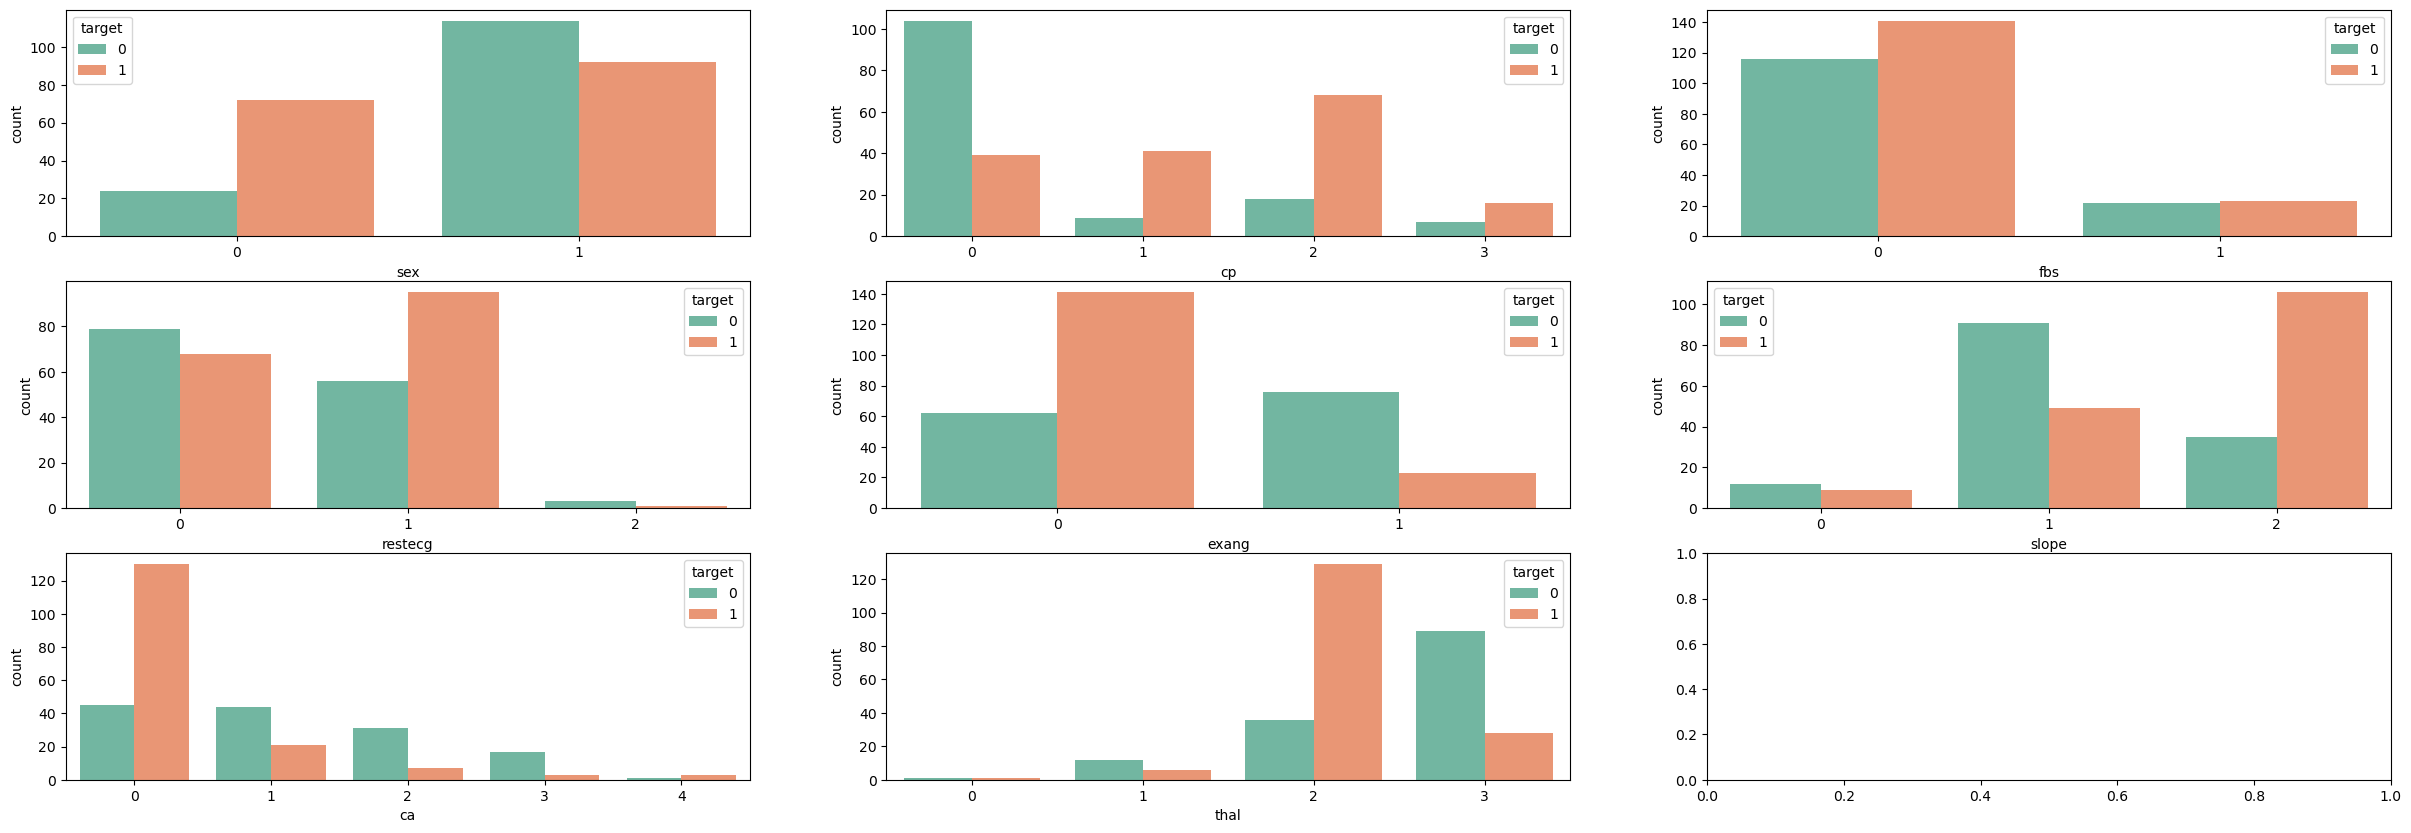

In [11]:
fig,axes=plt.subplots(nrows=3,ncols=3,figsize=(30,10))
for ind,feature in enumerate(cat_var):
    ax=axes[int(ind/3),ind%3]
    sns.countplot(x=feature,data=df,hue='target',ax=ax,palette='Set2')
plt.show()

Study the occurrence of CVD across Age.

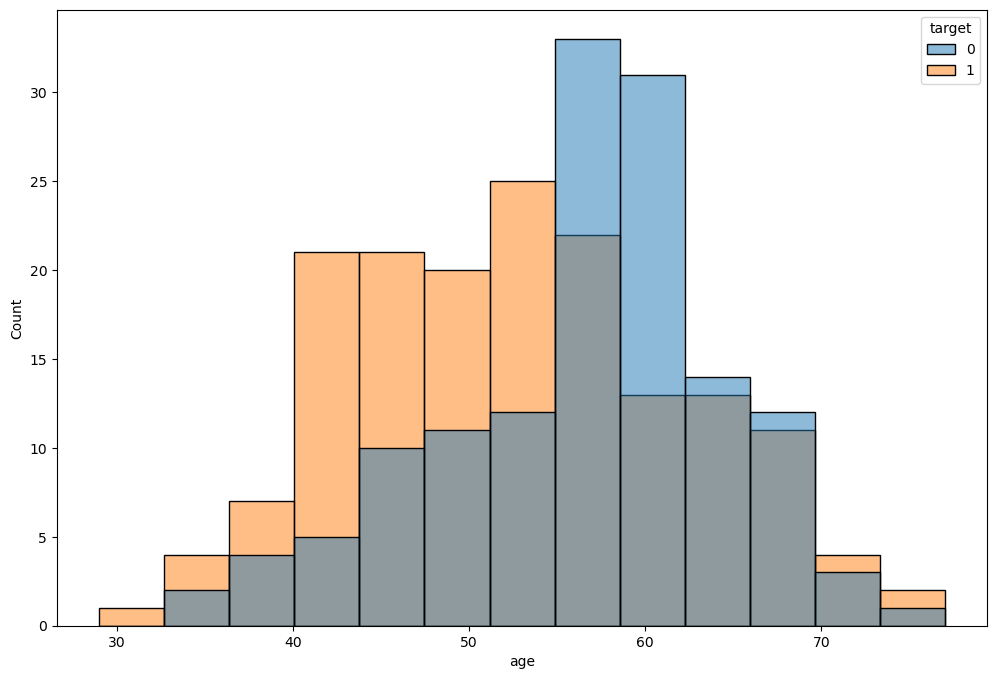

In [12]:
plt.figure(figsize=(12,8))
sns.histplot(x='age',hue='target',data=df)
plt.show()

Study the composition of overall patients w.r.t. Gender.

In [13]:
male_t=sum((df['sex']==1) & (df['target']==1))
female_t=sum((df['sex']==0) & (df['target']==1))
male_n=sum((df['sex']==1) & (df['target']==0))
female_n=sum((df['sex']==0) & (df['target']==0))

In [14]:
t_1=[male_t,female_t]
t_0=[male_n,female_n]

In [15]:
t_1

[92, 72]

Text(0.5, 1.0, 'Not having heart disease')

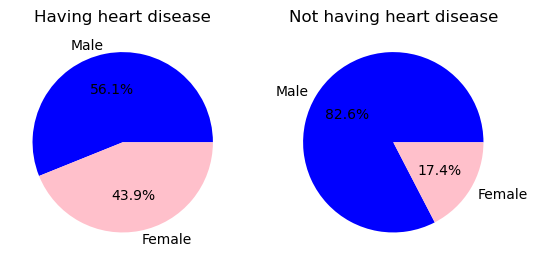

In [16]:
label=['Male','Female']
colors=['blue','pink']
plt.subplot(1,2,1)
plt.pie(t_1,labels=label,autopct="%.1f%%",colors=colors)
plt.title("Having heart disease")
plt.subplot(1,2,2)
plt.pie(t_0,labels=label,autopct="%.1f%%",colors=colors)
plt.title("Not having heart disease")

Can we detect a heart attack based on anomalies in the Resting Blood Pressure of the patient?
Describe the relationship between Cholesterol levels and our target variable.
What can be concluded about the relationship between peak exercising and the occurrence of a heart attack.
Is thalassemia a major cause of CVD?
How are the other factors determining the occurrence of CVD?

<AxesSubplot:>

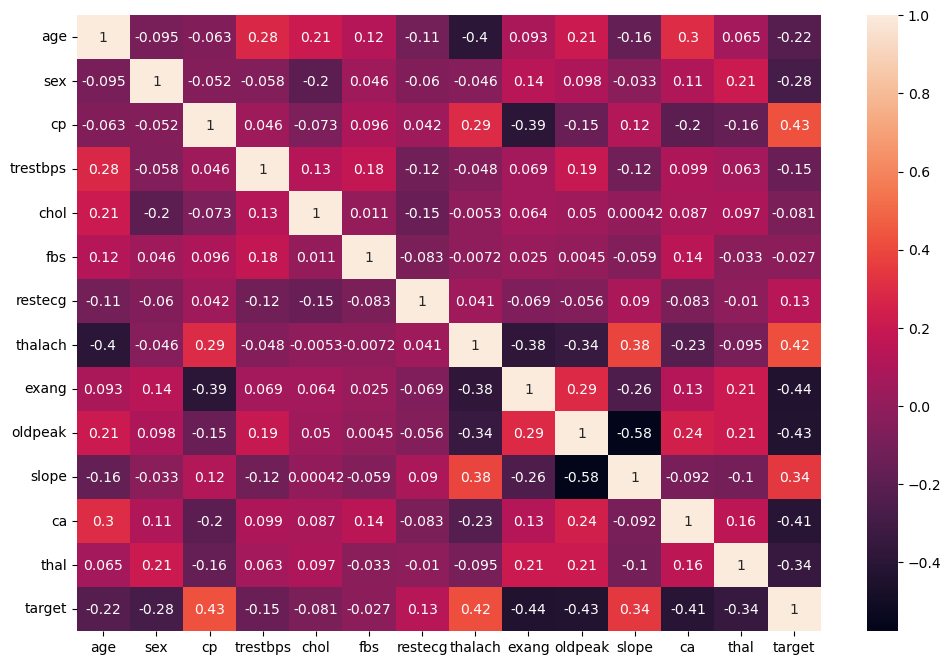

In [17]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

Is thalassemia a major cause of CVD?

In [18]:
th_3_t=sum((df['thal']==1) & (df['target']==1))
th_6_t=sum((df['thal']==2) & (df['target']==1))
th_7_t=sum((df['thal']==3) & (df['target']==1))
th_3_n=sum((df['thal']==1) & (df['target']==0))
th_6_n=sum((df['thal']==2) & (df['target']==0))
th_7_n=sum((df['thal']==3) & (df['target']==0))

In [19]:
cvd_1_th=[th_3_t,th_6_t,th_7_t]
cvd_0_th=[th_3_n,th_6_n,th_7_n]
print(cvd_1_th)
print(cvd_0_th)

[6, 129, 28]
[12, 36, 89]


Text(0.5, 1.0, 'Not having heart disease')

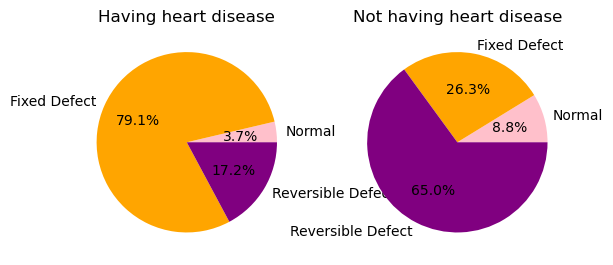

In [20]:
label=['Normal','Fixed Defect','Reversible Defect']
color=['pink','orange','purple']
plt.subplot(1,2,1)
plt.pie(cvd_1_th,labels=label,autopct="%.1f%%",colors=color)
plt.title("Having heart disease")
plt.subplot(1,2,2)
plt.pie(cvd_0_th,labels=label,autopct="%.1f%%",colors=color)
plt.title("Not having heart disease")

In [21]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

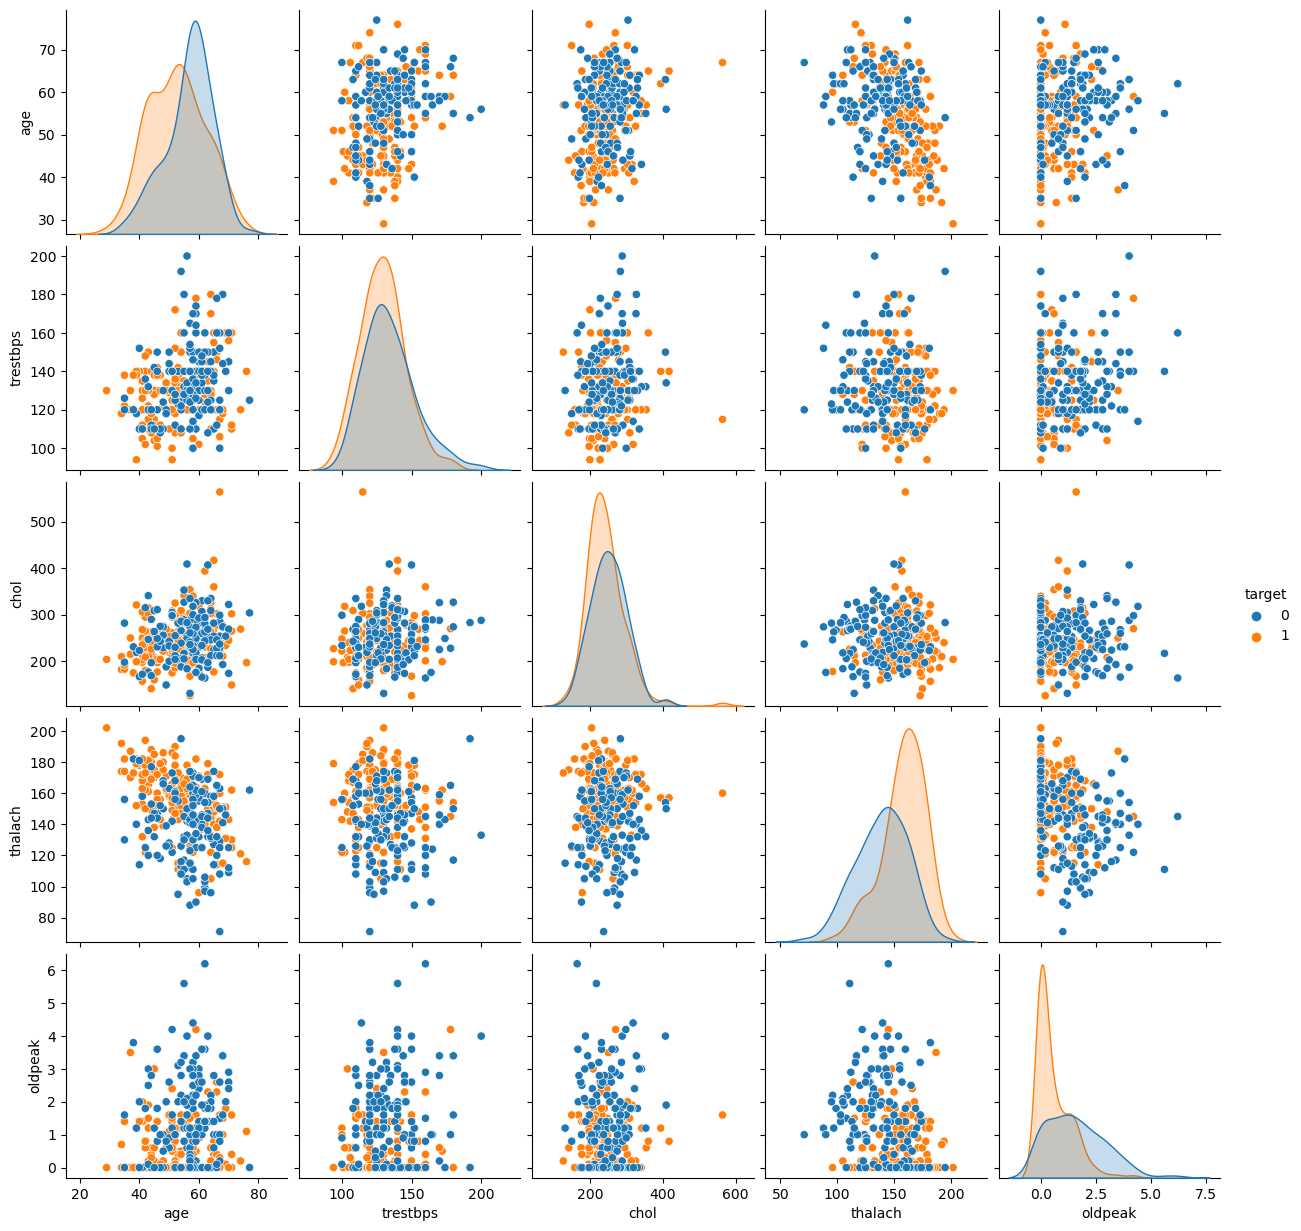

In [22]:
num_var=['age','trestbps','chol','thalach','oldpeak']
sns.pairplot(df[num_var+['target']],hue='target')

Perform logistic regression, predict the outcome for test data, and validate the results by using the confusion matrix.

In [23]:
column=['age', 'sex','trestbps', 'chol', 'fbs', 'restecg','target','slope']
x=df.drop(columns=column,axis=1)
y=df['target']

In [24]:
x

,cp,thalach,exang,oldpeak,ca,thal
0,3,150,0,2.3,0,1
1,2,187,0,3.5,0,2
2,1,172,0,1.4,0,2
3,1,178,0,0.8,0,2
4,0,163,1,0.6,0,2
...,...,...,...,...,...,...
298,0,123,1,0.2,0,3
299,3,132,0,1.2,0,3
300,0,141,0,3.4,2,3
301,0,115,1,1.2,1,3


In [49]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 302, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [26]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.fit_transform(x_test)

In [27]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(random_state=0)
model.fit(x_train_scaled,y_train)

LogisticRegression(random_state=0)

In [28]:
coeff=model.coef_[0]
coeff_table=pd.DataFrame(coeff,x_train.columns,columns=['coefficient'])

In [29]:
coeff_table

,coefficient
cp,0.785216
thalach,0.677273
exang,-0.589145
oldpeak,-0.923766
ca,-0.850225
thal,-0.611643


In [30]:
y_pred=model.predict(x_test_scaled)

In [31]:
y_pred

array([0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0], dtype=int64)

In [32]:
y_actual=y_test.values

In [33]:
result=pd.DataFrame({'Actual target value':y_actual,'Predicted target value':y_pred})

In [34]:
result

,Actual target value,Predicted target value
0,0,0
1,1,1
2,1,1
3,0,0
4,1,1
...,...,...
86,1,0
87,1,1
88,1,0
89,0,1


In [35]:
from sklearn.metrics import r2_score
r_sq=r2_score(y_test,y_pred)
print("R- square = ",r_sq)

R- square =  0.23187686196623636


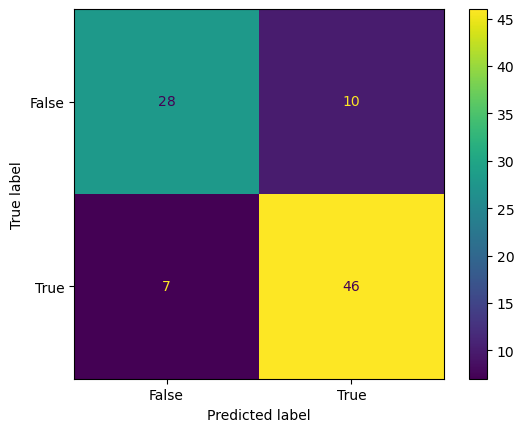

In [36]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [37]:
Accuracy = metrics.accuracy_score(y_test, y_pred)
print("Model Accuracy = ",Accuracy) 

Model Accuracy =  0.8131868131868132


In [38]:
inp=df.copy()

In [39]:
inp.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [40]:
inp['sex'].replace(to_replace={1:'male',0:'female'},inplace=True)

In [41]:
inp['fbs'].replace(to_replace={1:'true',0:'false'},inplace=True)

In [42]:
inp['exang'].replace(to_replace={1:'true',0:'false'},inplace=True)

In [43]:
inp['thal'].replace(to_replace={1:'normal',2:'fixed defect',3:'reversable defect'},inplace=True)

In [44]:
inp['age'].unique()

array([63, 37, 41, 56, 57, 44, 52, 54, 48, 49, 64, 58, 50, 66, 43, 69, 59,
       42, 61, 40, 71, 51, 65, 53, 46, 45, 39, 47, 62, 34, 35, 29, 55, 60,
       67, 68, 74, 76, 70, 38, 77], dtype=int64)

In [45]:
inp['having CVD']=np.where(inp['target']==1,'yes','no')

In [46]:
inp.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,having CVD
0,63,male,3,145,233,true,0,150,false,2.3,0,0,normal,1,yes
1,37,male,2,130,250,false,1,187,false,3.5,0,0,fixed defect,1,yes
2,41,female,1,130,204,false,0,172,false,1.4,2,0,fixed defect,1,yes
3,56,male,1,120,236,false,1,178,false,0.8,2,0,fixed defect,1,yes
4,57,female,0,120,354,false,1,163,true,0.6,2,0,fixed defect,1,yes
5,57,male,0,140,192,false,1,148,false,0.4,1,0,normal,1,yes
6,56,female,1,140,294,false,0,153,false,1.3,1,0,fixed defect,1,yes
7,44,male,1,120,263,false,1,173,false,0.0,2,0,reversable defect,1,yes
8,52,male,2,172,199,true,1,162,false,0.5,2,0,reversable defect,1,yes
9,57,male,2,150,168,false,1,174,false,1.6,2,0,fixed defect,1,yes


In [47]:
inp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         302 non-null    int64  
 1   sex         302 non-null    object 
 2   cp          302 non-null    int64  
 3   trestbps    302 non-null    int64  
 4   chol        302 non-null    int64  
 5   fbs         302 non-null    object 
 6   restecg     302 non-null    int64  
 7   thalach     302 non-null    int64  
 8   exang       302 non-null    object 
 9   oldpeak     302 non-null    float64
 10  slope       302 non-null    int64  
 11  ca          302 non-null    int64  
 12  thal        302 non-null    object 
 13  target      302 non-null    int64  
 14  having CVD  302 non-null    object 
dtypes: float64(1), int64(9), object(5)
memory usage: 45.9+ KB


In [48]:
inp.to_excel('data modified.xlsx')